This are the angles for the controlled-U gates:
Controlled-U 0 >>>  Rotation-angle: 2 π/3
Controlled-U 1 >>>  Rotation-angle: 4 π/3
Controlled-U 2 >>>  Rotation-angle: 8 π/3
Controlled-U 3 >>>  Rotation-angle: 16 π/3
Controlled-U 4 >>>  Rotation-angle: 32 π/3


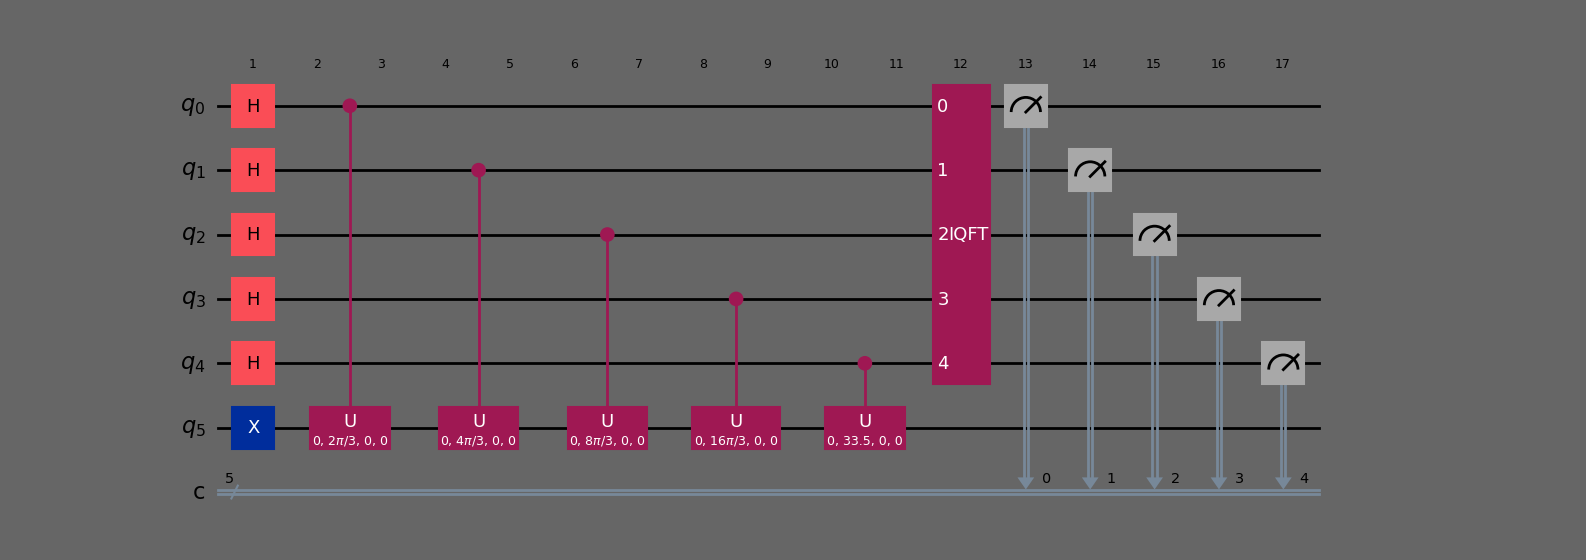

In [10]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import math
from qiskit.circuit.library import QFT

# importing the style for the circuit from local *.py file.
import sys
sys.path.append('C:/Users/Gustavo_Porcilio/ALGORITHMS/Doc_help')
from circuit_style import style

# Five qubits for the counting register and one 
#qubit for the eigenstate |psi>
nQubits = 6

qpe = QuantumCircuit(nQubits, nQubits-1)

# H-Gates to control qubits:
for qubit in range(nQubits-1):
    qpe.h(qubit)

# Eigenstate |psi>:
qpe.x(nQubits-1)

# Controlled-U angles (theta) for qubits in descending order:
angle = 2*math.pi/3

print("This are the angles for the controlled-U gates:")
for control_qubit in range(nQubits-1):

    print("Controlled-U", control_qubit, ">>>  Rotation-angle:", 2**(control_qubit+1),  "\u03C0" "/3" )
    qpe.cu(0, angle, 0, 0, control_qubit, nQubits-1);
    angle *= 2

qpe.append(QFT(nQubits-1, inverse=True), range(nQubits-1))

for n in range(nQubits-1):
    qpe.measure(n,n)

qpe.draw(style=style, output="mpl")